# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

/home/aisik/anaconda3/envs/ipykernel2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
%matplotlib inline

# Data to be used in this project

In [3]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry')  # Alcohol comsumption by country
titanic = sns.load_dataset('titanic')                # Data about the tittanic tragedy
titanic = titanic[titanic.age.notnull()]
iris  = sns.load_dataset('iris')                     # Data about the three flowers in the iris dataset

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Helpful tips for dataframes manipulation 
1. if column name of dataframe `A` has space in it like "column names", use
```python
A["column names"]  # gets column `column name`
```

2. If columns name of dataframe has no space in it like "column_name", use the dot notation or the approach in 1.
```python
A.column_name    # gets column `column_name`
```
3. The first few columns of data set A
```python
A.head(n = 5)  # the argument n can be any number up to the number of observations in the data set
```

4. Columns of data set A that need droping

```python
ind, = np.nonzero(np.array([x.name for x in A.dtypes.values]) == 'object')
to_drop = [x for i,x in enumerate(A.dtypes.index.values) if i in ind]
# dropping columns to_drop
A.drop(to_drop, axis = 1, inplace = True)
```

5. Dimension of data set A

```python
A.shape   # return a tuple (nrows, ncols). Example (34,4)
```

# Problem 1
Some of the names of the plotting function in seaborn can be a little confusing, example the `jointplot` which is popuplar known for scatter plotting is not as intuitive as one may think.

-Create a function called `scatterplot`, takes two arguments `x` and `y`, `kind`.
    - The function should wrap around the `jointplot`.
    - The `kind` parameter should have values "scatter" or "hex" to return a scatter or hexbin plot. Here note that you may want to consider using the hexbin matplotlib namespace or the "kind" parameter in jointplot
    
Here is something to get you started:

```python
def scatterplot(x, y, kind = None):
    if kind is None:
        pass  # implement scatter plot stuff here
    else:
        pass # implement hexbin stuff here
```

-Test your code with columns `beer_servings` and `wine_servings` in the `drinks` data set

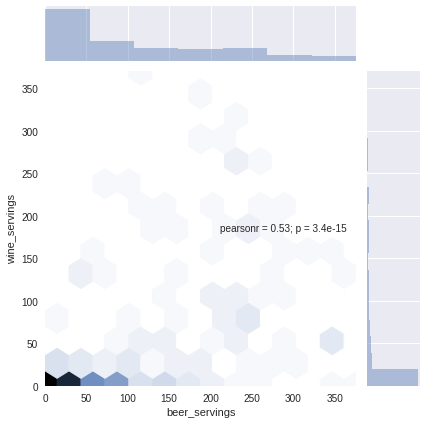

In [5]:
def scatterplot(x, y , kind = None):
    if kind is None:
        return sns.jointplot(x,y)
    else:
        return sns.jointplot(x, y, kind = 'hex')
        
scatterplot(drinks.beer_servings, drinks.wine_servings, kind = 'hex')

# Problem 2

We are going to create our own **`pairplot-like`** function.
Using seaborns style settings `whitegrid`, create a function using matplotlib's `scatter` function to create function called `pairPlot`. 

Guidlines:
1. It should take in the argument `data`, `s`, `c` and `**kw`
2. Determine the number of numerical columns and call it `ncol`
3. Create square subplots of size `ncol by ncol`
4. Plot each pair of variable on each axes.
5. return the axes objects
6. Test your function with the **iris** data set


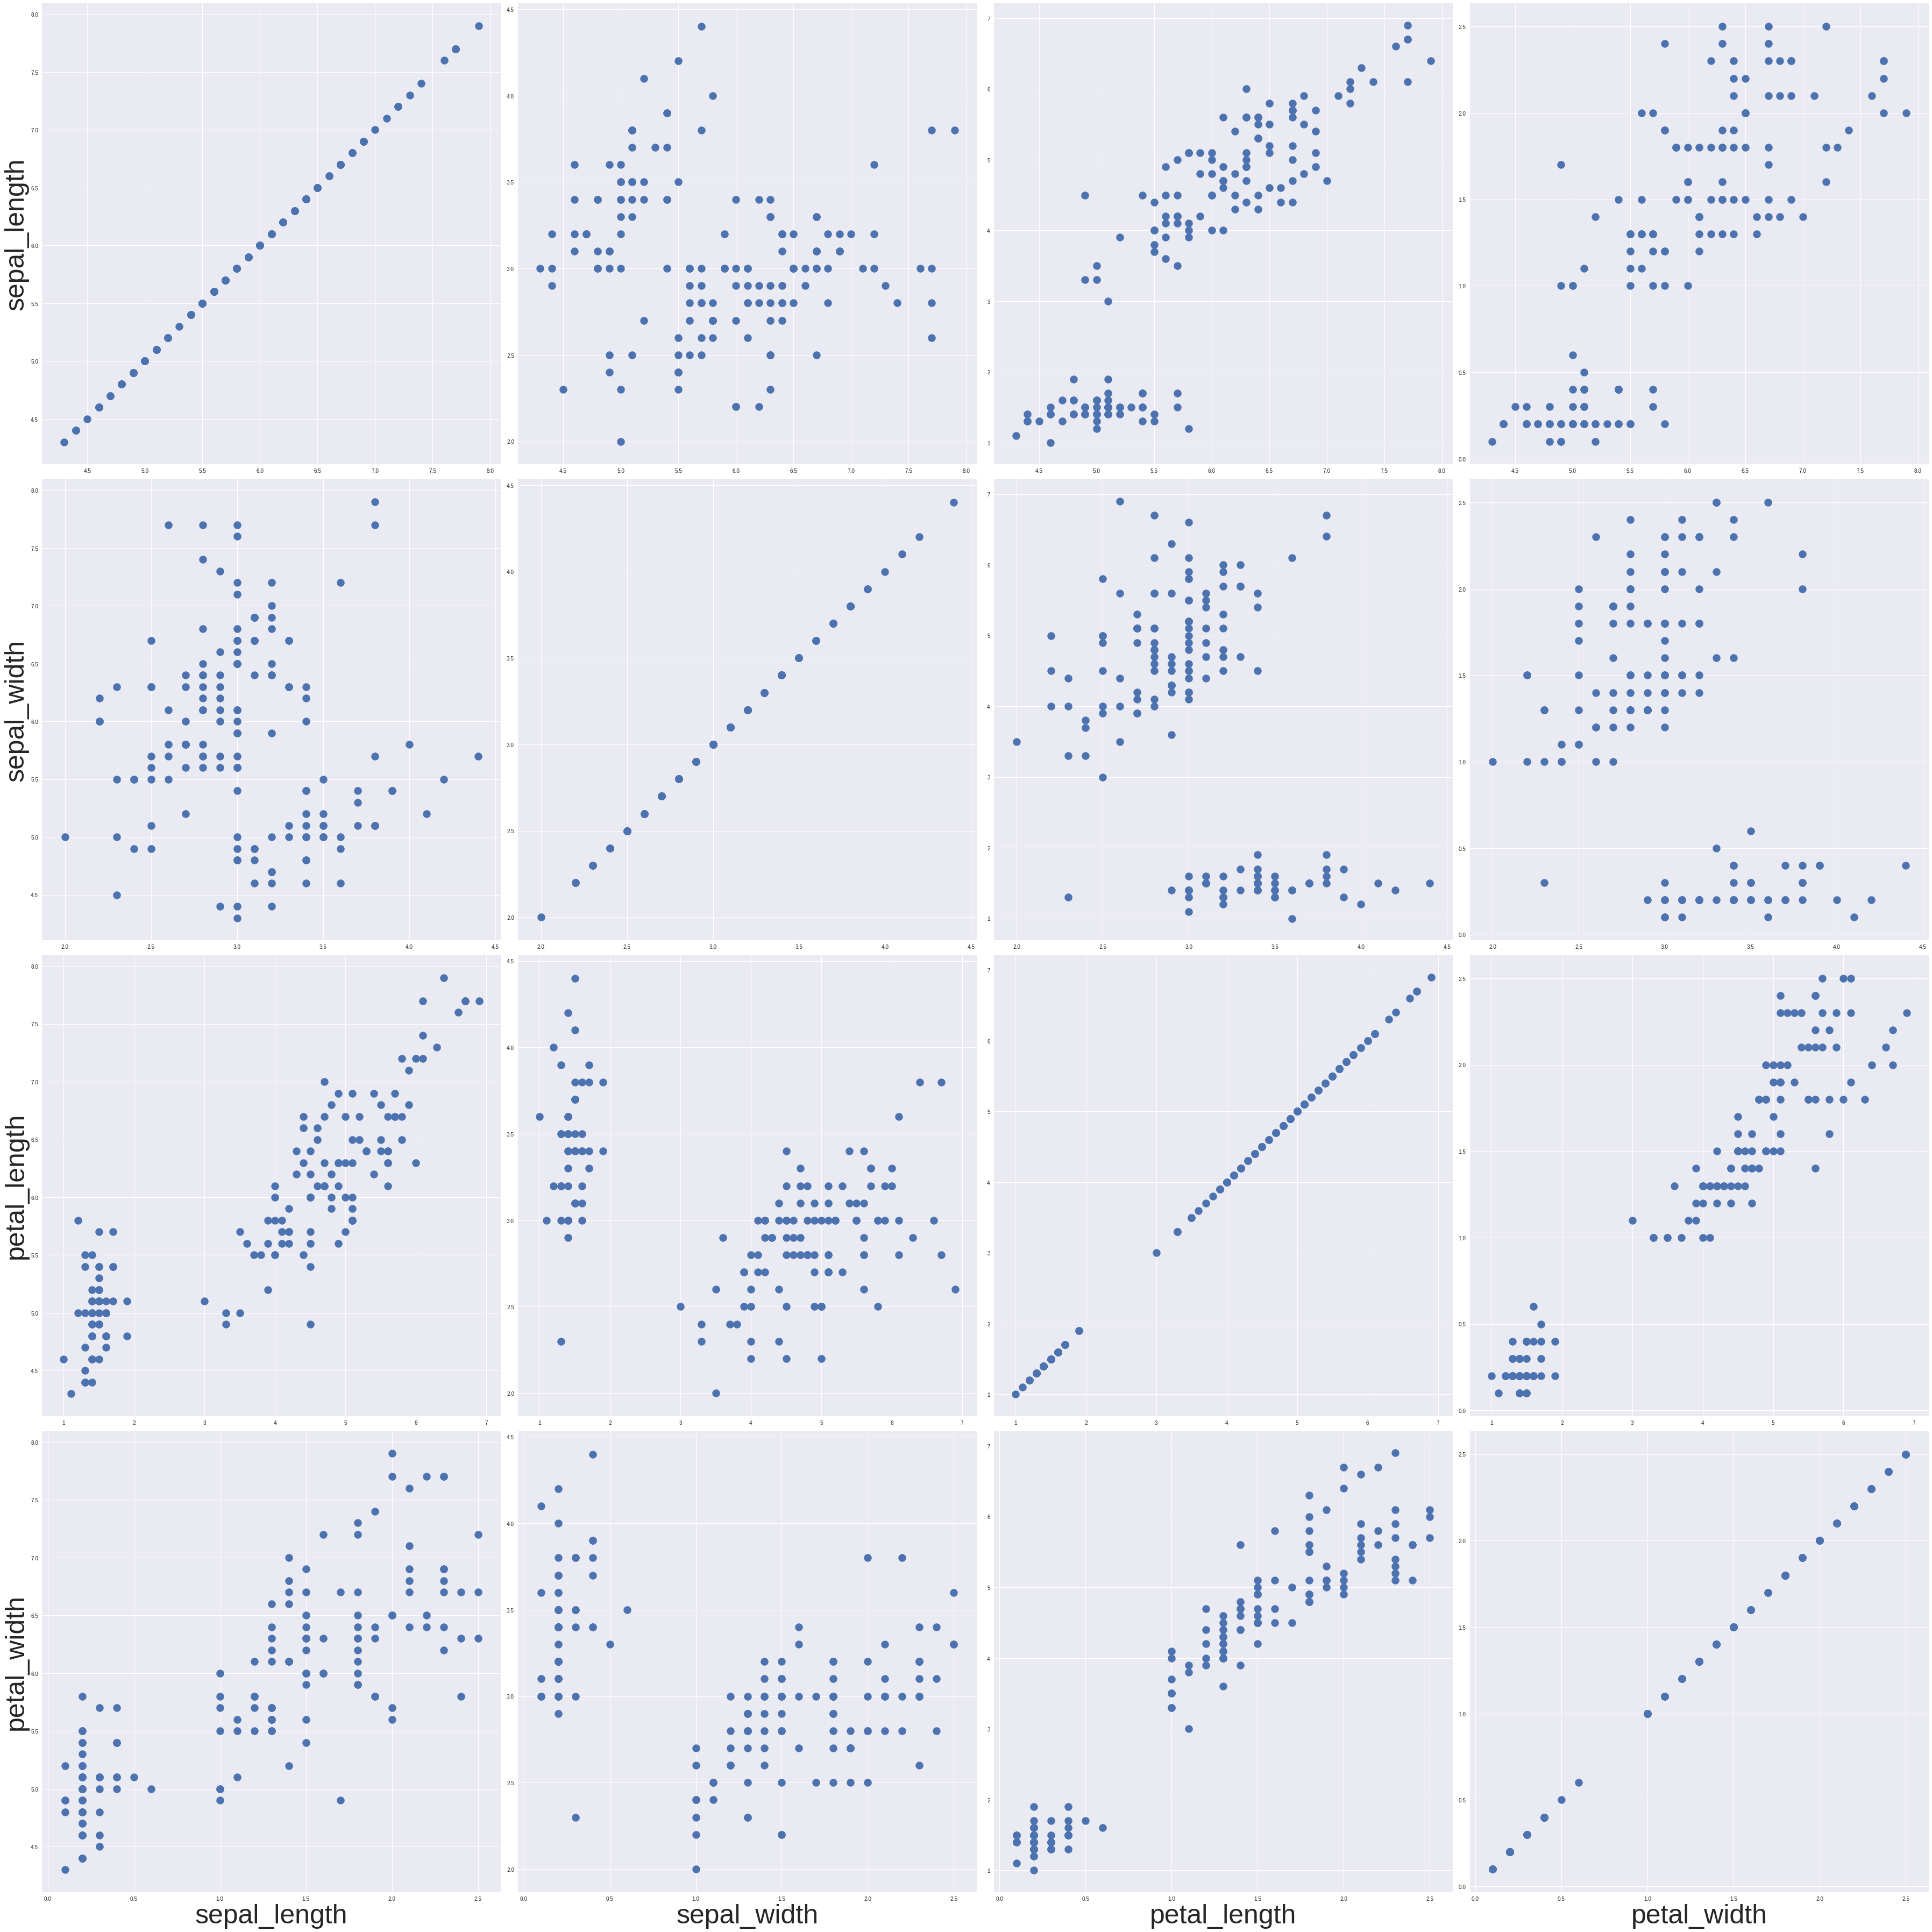

In [6]:
def pairPlot(data, s = 20 ,c = None, ax_label_sz = 50, figsize = (8,6), **kw):
    """
    This routine tries to plot scatter plot of the numerical columns of the data arguments
    
    input
    =====
    data: Dataframe or numpy two-dimensional array
    s:    The size of the data points
    c:    string or numeric array of size equal to the columns of the numerical columns
          Color. Maps numeric values in data to colors
    ax_label_size: number
                   Font size of the x and y labels
    figsize: tuple
            The figure window size
            
    return
    ======
    An array of axes object for each of the subplots
    """
    
    
    ind, = np.nonzero(np.array([x.name for x in data.dtypes.values]) == 'object')
    to_drop = [x for i,x in enumerate(data.dtypes.index.values) if i in ind]

    data.drop(to_drop, inplace = True, axis = 1)
    
    ncol = data.shape[1]
    col_names = data.columns
    
    fig, axes = plt.subplots(ncol, ncol, figsize = figsize)
    
    sns.set_style('whitegrid')
    for i in xrange(ncol):
        for j in xrange(ncol):
            axes[i,j].scatter(data[col_names[i]], data[col_names[j]],s = s , c = c, **kw)
            if i == ncol-1 :
                axes[i,j].set_xlabel(col_names[j], fontsize = ax_label_sz)
            if j == 0:
                axes[i,j].set_ylabel(col_names[i], fontsize = ax_label_sz)
    
    plt.tight_layout()
    return axes
            

            
    
pairPlot(iris, s = 200, figsize = (50, 50), ax_label_sz = 50);

# Problem 3

In this problem we are going to stimulate a random walk of stock price

RANDOM WALK:
    For every time step, the stock moves up or down by $\pm 1$. Here the distance it moves is per time (seconds) is 1. We assume that the stock always starts at time 0 with no step taken. Thus it starts at point (0,0)
    
1. Create a function **`random_walk`** that takes in the number of time step and distance as parameter
2. Stimulate your random walk for the following
    1. steps: 1, 0.5, 0.3, 0.1
    2. total time: 1min = 60sec, 2mins, 1.5mins
    
    Note you shold have 12 graphs 
3. Simulte your random walk for the steps in 2.A on the same graph for the total_time 10mins
4. Make sure your graph is well labeled for both the x and y axis. give it a title and while you at it provide a legend when necessary

In [7]:
def random_walk(total_time = 1, steps = 1):
    """
    This routine simulates a random walk
    
    input
    =====
    total_time: total number of time for the walk in minutes
    steps:  the distance made per second
    
    return
    ======
    time:  An array of times
    distance: An array of distances calculated in accumulation of steps
    """
    
    total_time = int(np.round(total_time*60))
    distance = np.zeros(total_time)
    time = np.zeros_like(distance)
    choose = [-steps,steps]
    for i in xrange(1,total_time):
        distance[i] = distance[i-1] + np.random.choice(choose)
        time[i] = time[i-1] + 1
        
    return time, distance



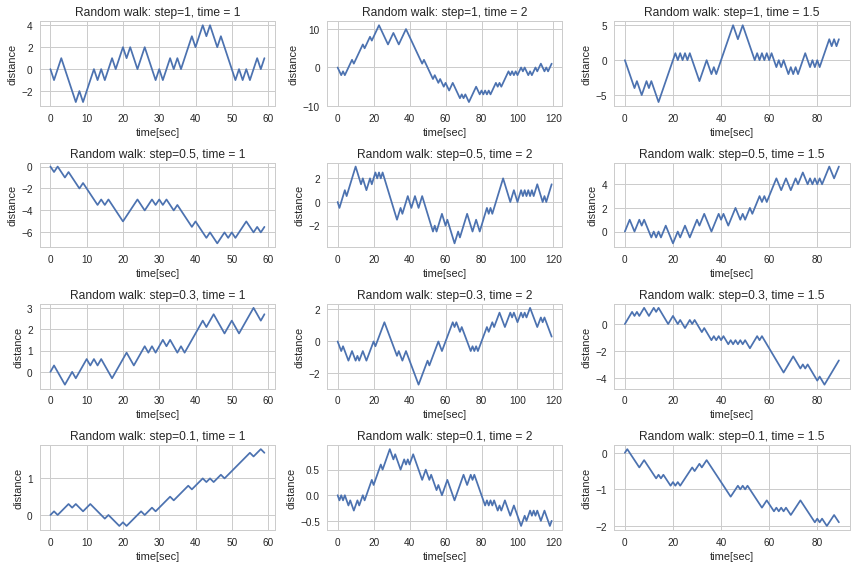

In [8]:
# Simulation of random walk

np.random.seed(sum(map(ord, 'random_walk')))
steps = [1, 0.5, 0.3, 0.1]
total_time = [1,2, 1.5]
fig, axes = plt.subplots(4,3, figsize =(12,8))
# fig.suptitle('Simulation of random walk')
for i in range(4):
    
    for j in range(3):
        
        time, dist = random_walk(total_time[j],steps = steps[i])
        ax = axes[i,j]
        ax.plot(time, dist)
        ax.set_xlabel("time[sec]")
        ax.set_ylabel("distance")
        ax.set_title('Random walk: step={0}, time = {1}'.format(steps[i], total_time[j]))
        
plt.tight_layout()

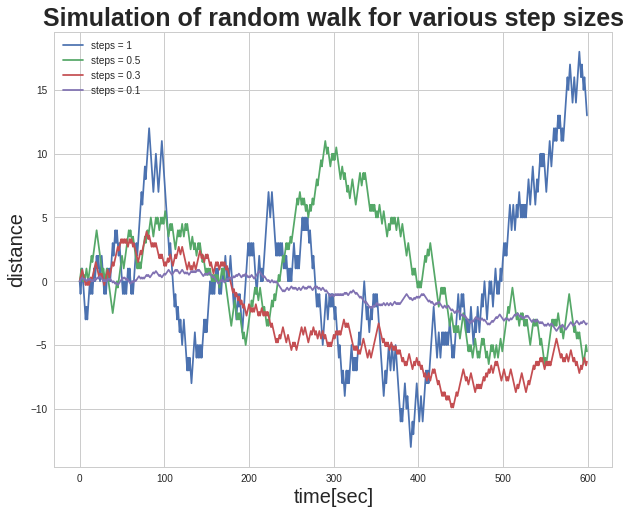

In [9]:
# Simulation of multiple random walk on the same graph

np.random.seed(sum(map(ord, 'random_walk')))
steps = [1, 0.5, 0.3, 0.1]
total_time = 10
fig, ax = plt.subplots(figsize =(10,8))

for s in steps:
    time, dist = random_walk(total_time, steps = s)
    ax.plot(time,dist, label = 'steps = {}'.format(s))
    ax.set_xlabel("time[sec]", fontsize = 20)
    ax.set_ylabel("distance", fontsize = 20)
    ax.set_title("Simulation of random walk for various step sizes", weight = 'bold', fontsize = 25)
    ax.legend(loc = 0)
    

# Problem 4

This next problem is aimed at exploring the titanic data set. If you have run the third cell of this notebook, you should have the __`titanic`__ dataframe in your namespace.

1. Using seaborn _`countplot`_ function, make a bar graph of __`class`__ by __`sex`__ 
2. Using seaborn _`barplot`_ function, make a bar graph of __`class`__ by __`survived`__ and further segmented by  __`sex`__. What do you notice? Can you explain why?
3. Using seaborn _`distplot`_, function make both the kernel density graph and histogram of the __`age`__ variable. Also make the rug plot on the same graph. What do you notice?
4. make a comparison between the distribution of the **`age`** by **`sex`**. Use a __boxplot__. What do you notice?
5. Make a _`violinplot`_ of __`fare`__ by __`class`__ and overlay/color it by __`sex`__. Next make a swarm plot on the same graph. Make a comment on what you see
6. Using the code below:
   1. Among the **`survived`**, make a plot indicating the distribution (Boxplot) of **`age`** by **`sex`**. Do same for those that are **`dead`** and plot both on the same canvas. Comment on what you see
   2. Make plot of the fare distribution (kernel density plot) of both survived and dead on the same canvas Comment on what you see
  
  
```python
survived = titanic.loc[titanic.survived == 1,:]
dead = titanic.loc[titanic.survived == 0,:]
```
  

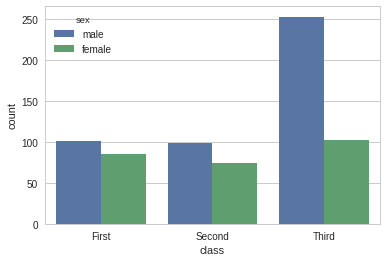

In [10]:
# 1 Frequency distribution of class vs sex
# More males than females in class. Could be that most men were in the workforce that females at the time

sns.countplot('class', hue ='sex', data = titanic);

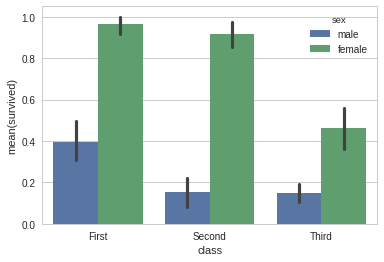

In [11]:
# 2. Bar graph of Survived with class and sex
# Within all the classes, females had the most survival rate
sns.barplot(x = 'class',y = 'survived',hue = 'sex', data = titanic);

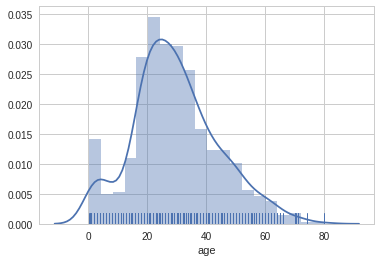

In [12]:
# 3 Most of the passengers were around the age of 25 years
sns.distplot(titanic.age, rug = True);

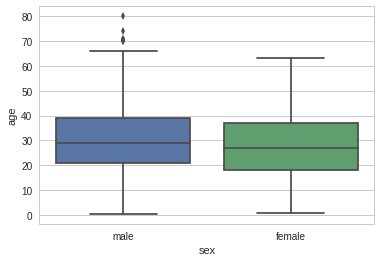

In [13]:
# 4 Both youngest and oldest person on the titanic were males
sns.boxplot('sex', 'age', data = titanic);

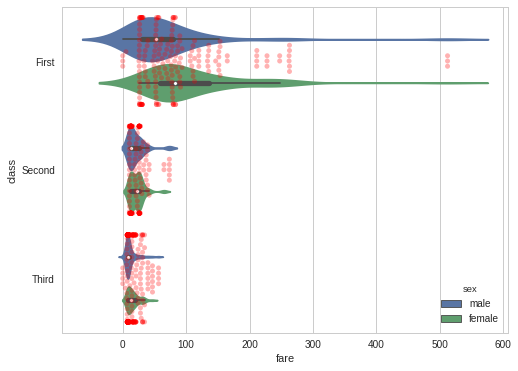

In [14]:
#5 Clearly the passengers in the first class paid the most. At the same time, it looks like females in the first 
# class paid higher fare to their male counter parts
plt.figure(figsize = (8,6))
sns.violinplot('fare', 'class',data = titanic, hue = 'sex')
sns.swarmplot('fare', 'class',data = titanic,color = 'red', alpha = 0.3);

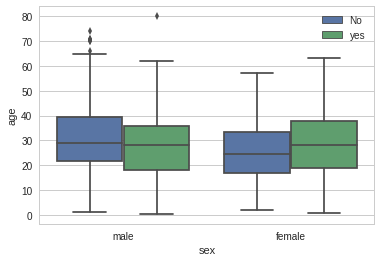

In [15]:
#6 Amongst the dead  the median age of the men was larger that of the females. However the stories a bit different
# when it come to the survived. The median age seems to quite the same.
ax = sns.boxplot('sex', 'age', data = titanic, hue = 'survived');
ax.legend(labels = ['No', 'yes'], handles = ax.patches);

In [16]:
survived = titanic.loc[titanic.survived == 1,:]
dead = titanic.loc[titanic.survived == 0,:]

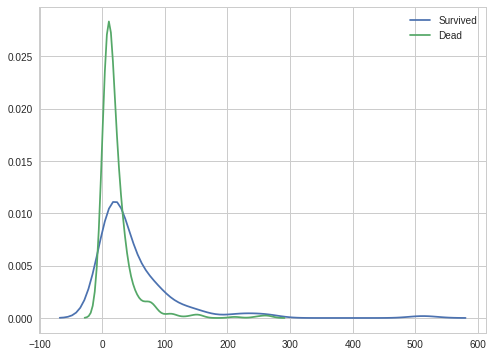

In [17]:
#6 Looks like most of the dead paid very low fare compared compared to survived. It seems to look paying for first 
# can save your life sometimes

fig, ax = plt.subplots(figsize = (8,6))
sns.kdeplot(survived.fare, label = 'Survived', ax = ax)
sns.kdeplot(dead.fare, label = 'Dead', ax = ax);